<a href="https://colab.research.google.com/github/Ju-Mercer/Projeto-Transfer-Learning/blob/main/Projeto_Transfer_Learning_cat_vs_dog_Juli.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [56]:
import numpy as np
import torch
import torch.nn as F
import torchvision
import matplotlib.pyplot as plt
from time import time
from torchvision import datasets, transforms
from torch import nn, optim

 Objetivo é criar projeto usando transfer learning para treinar uma rede neural a distinguir uma gramímea especifíca pouco estudada: Braquiaria plantaginea de outras pertencentes ao gënero. Para isso utilizarei um banco de dado que criei com 100 imagens da espécie de interesse e outro, com 100 fotos de outras especies de gramíneas. S

estou treinando a aula do prof Dieto da DIO.ME da aula Ïmplementando uma deep learning do zero no Python"

In [57]:
transform = transforms.ToTensor() #definindo a conversao de imagem para tensor

trainset = datasets.MNIST('./MNIST_data/', download=True, train=True, transform=transform) #Carrega a parte de treino do Dataset
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True) #Cria um buffer para pegar os dados por partes

valset = datasets.MNIST('./MNIST_data/', download=True, train=False, transform=transform) #Carrega a parte de validacao
valloader = torch.utils.data.DataLoader(valset, batch_size=64, shuffle=True) #cria um buffer para pegar os dados por partes

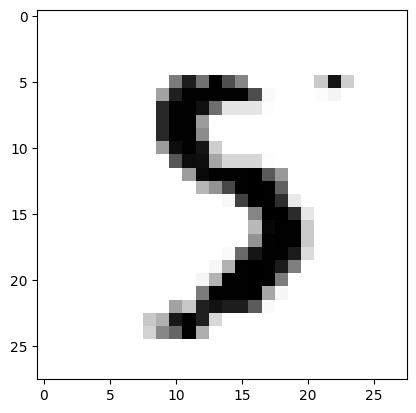

In [58]:
dataiter = iter(trainloader)
imagens, etiquetas = next(dataiter)
plt.imshow(imagens[0].numpy().squeeze(), cmap='gray_r');

In [59]:
print(imagens[0].shape) #para verificar as dimensoes do tensor de cada imagem
print(etiquetas[0].shape) #para verificar a dimensao davetiqueta

torch.Size([1, 28, 28])
torch.Size([])


In [60]:
class Modelo(nn.Module):
  def __init__(self):
    super(Modelo, self).__init__()
    self.linear1 = nn.Linear(28*28, 128) #camada de entrada, 784 neuronios que se ligam a 128
    self.linear2 = nn.Linear(128, 64) #camada interna1, 128 neuronios que se ligam a 64
    self.linear3 = nn.Linear(64, 10) #camada interna2, 64 neuronios que se ligam a 10
    # para a camada de saída náo é necessario definir nada pois só preisamos pegar o output da camada interna2

  def  forwart(self, x):
    X = F.rule(self.linear1(X)) # funcáo de ativacao da camada de entrada1
    X = F.relu(self.linear2(X)) # funcão de ativacao da camada interna1 para a camada interna2
    X = self.linear3(X) # funcão de ativacao da camada interna2 para a camada de saída, nesse cado f(x) = x
    return F.log_softmax(X, dim=1) #dados utilizados para calcular a perda

In [61]:
def treino(modelo, trainloader, device):


  otimizador = optim.SGD(modelo.parameters(), lr=0.01, momentum=0.5) #definindo o otimizador, ou definindo a politica de atualizacao de pesos e de bias
  inicio = time() #timer para contar quanto tempo levou o treino

  criterio = nn.NLLLoss() #definindo a funcao de perda
  EPOCHS = 10 #numero que o algoritmo rodará, iniciar teste com 10 e depois aumentar para 30
  modelo.train() #ativando o modo de treinamento de modelo

  for epoch in range(EPOCHS):
    perda_acumulada = 0 #inicia a perda acumulada em 0

    for imagens, etiquetas in trainloader:

      imagens = imagens.view(imagens.shape[0], -1) #convertendo as imagens para vetores de 28*28 para fi
      otimizador.zero_grad() #zerando os gradientes por conta do ciclo anterios

      output = modelo(imagens.to(device)) #colocando os dados no modelo
      perda_instantanea = criterio(output, etiquetas.to(device)) #calculando a perda do epoch em questao

      perda_instantanea.backward() #back propagation a partir da perda

      otimizador.step() #atualizando os pesos e os bias

      perda_acumulada += perda_instantanea.item() #acumulando a perda acumulada

    else:
      print("Epoch {} - Perda resultante: {}".format(epoch+1, perda_acumulada/len(trainloader)))
      print("\nTempo de treino (em minutos) =", (time() - inicio)/60)


In [62]:
from logging import log
def validacao(modelo,valloader, device):
    conta_corretas, conta_todas = 0, 0
    for imagens, etiquetas in valloader:
        for i in range(len(etiquetas)):
            img = imagens[i].view(1, 784)
            # desativa a diferencacao automatica para acelerar a validacao. graficos computacionais dinamicos
            with torch.no_grad():
              logps = modelo(img.to(device)) #output do modelo em escala logaritmica

            ps = torch.exp(logps) #converte output para escala normal, lembrando que é um tensor
            probab = list(ps.cpu().numpy()[0])
            etiqueta_pred = probab.index(max(probab)) #converte o tensor em um numero, no caso o numero que o modelo previu
            etiqueta_certa = etiquetas.numpy()[i]
            if(etiqueta_certa == etiqueta_pred): #compara a previsao com o valor correto
                conta_corretas += 1
            conta_todas += 1

    print("Total de imagens testadas =", conta_todas)
    print("\nPrecisão do modelo = {}%".format(conta_corretas*100/conta_todas))



In [63]:
modelo = Modelo()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
modelo.to(device)

Modelo(
  (linear1): Linear(in_features=784, out_features=128, bias=True)
  (linear2): Linear(in_features=128, out_features=64, bias=True)
  (linear3): Linear(in_features=64, out_features=10, bias=True)
)